IMPORT MODULE AND LOAD DATASET

In [5]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 


In [16]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
#Using dataset of Hand written digits
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [28]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.matshow(X[index])
    plt.xlabel(y[index])

<Figure size 1500x200 with 0 Axes>

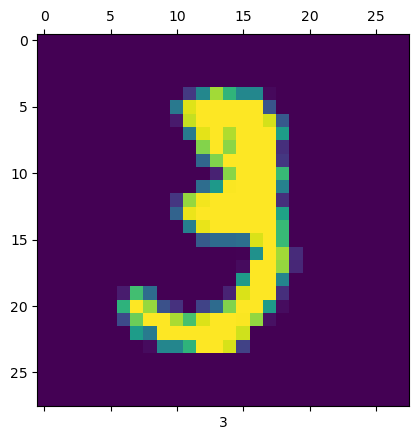

In [29]:
plot_sample(X_train, y_train, 10)

In [34]:
img_rows, img_cols = 28, 28

#reshape datasets to have channel = 1 
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

#scale into range between 0 and 1 
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train_scaled = X_train / 255
#X_test_scaled = X_test / 255 
#scaled input provided a worst result

Building LeNet Structure

In [35]:
lenet = keras.Sequential([
    keras.layers.Conv2D(filters=6,kernel_size=5,strides=1, padding='valid',activation='sigmoid'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='sigmoid'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

lenet.compile(optimizer= 'SGD',
              loss= keras.losses.BinaryCrossentropy,
              metrics=['accuracy'])

In [37]:
lenet.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.1448 - loss: 2.2908
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.2109 - loss: 2.2700
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3257 - loss: 2.1912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4389 - loss: 1.8643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5976 - loss: 1.3552
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7290 - loss: 0.9849
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7972 - loss: 0.7286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8378 - loss: 0.5723
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8561 - loss: 0.4887
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8692 - loss: 0.4429


In [39]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = lenet.predict(X_test)
y_pred_labels = [ np.argmax(i) for i in y_pred ]

print('Classification_report: ')
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.94      0.97      0.95      1135
           2       0.89      0.87      0.88      1032
           3       0.93      0.90      0.91      1010
           4       0.72      0.85      0.78       982
           5       0.89      0.87      0.88       892
           6       0.93      0.94      0.94       958
           7       0.88      0.89      0.88      1028
           8       0.90      0.87      0.89       974
           9       0.77      0.65      0.70      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [42]:
lenet_modified = keras.Sequential([
    keras.layers.Conv2D(filters= 6, kernel_size= 5, strides=1, padding='valid', activation='relu'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size = 5, strides=1, padding='valid', activation='relu'),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
lenet_modified.compile(optimizer='SGD',
                       loss = keras.losses.SparseCategoricalCrossentropy,
                       metrics=['accuracy'])

In [43]:
lenet_modified.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5549 - loss: 1.4051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9592 - loss: 0.1291
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9724 - loss: 0.0888
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9774 - loss: 0.0711
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9812 - loss: 0.0592
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9826 - loss: 0.0530
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9845 - loss: 0.0492
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9870 - loss: 0.0403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9866 - loss: 0.0384
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9885 - loss: 0.0345


In [46]:
y_pred = lenet_modified.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
print('Classification report for lenet_modified: ')
print(classification_report(y_test, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification report for lenet_modified: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Conclusion : LeNet works better when change base activation function to Relu activation function.